# Bird Species Ecological Classification

Welcome to this Notebook!

**Introduction**: This Jupyter Notebook documents the implementation of a Machine Learning (ML) pipeline designed to classify avian species into six distinct ecological groups based on skeletal measurements. Following the strategic proposal developed in Assessment 1 (AS1), this project transitions from theoretical design to practical application using the Scikit-learn framework. The primary objective is to develop a robust multi-class classifier that can accurately map 10 skeletal features—representing lengths and diameters of wings, legs, and feet—to a bird's ecological niche (e.g., Swimming Birds, Raptors, or Singing Birds). In this notebook, we will:
- **Perform a rigorous Exploratory Data Analysis (EDA)** to uncover underlying patterns, identify data quality issues (such as missing values), and understand feature correlations.
- **Execute Data Preprocessing** to ensure the dataset is optimized for algorithmic ingestion, focusing on feature scaling and handling class imbalances.
- **Evaluate and Compare Three ML Architectures** to determine the optimal model based on a comprehensive suite of metrics including AUC, ROC curves, and confusion matrices.

##### Notebook Contents:
##### 1. Data Description & Initial Loading
- Loading the bird.csv dataset.
- Defining feature semantics (e.g., humerus, ulna, femur, and tarsometatarsus measurements).

##### 2. Exploratory Data Analysis (EDA)
- Descriptive Statistics: Analyzing the central tendency and dispersion of the skeletal measurements.
- Feature Distribution: Visualizing the spread of data to detect skewness and outliers.
- Target Variable Distribution: Assessing class balance across the six ecological groups (SW, W, T, R, P, SO).
- Correlation Analysis: Investigating Multi-collinearity between bone lengths and diameters.

##### 3. Data Preprocessing
- Handling Missing Data: Implementing strategies for null values within the bone measurements.
- Encoding Categorical Variables: Transforming the 'type' labels for machine learning compatibility.
- Feature Engineering & Selection: Justifying the retention or removal of specific skeletal features based on EDA findings.

##### 4. Model Development & Evaluation
- Train-Test Split: Partitioning the data with scientific justification.
- Model Training: Implementing three distinct classifiers (e.g., Random Forest, SVM, and Logistic Regression).
- Performance Metrics: Detailed analysis using Sensitivity, Specificity, Loss, AUC, and ROC curves.
- Final Justification: Selecting the optimal model for the Zoological Society of London.
------------------------------------------------------------------------------------------------------------------------------------------------------

## 1. Data Description & Initial Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the file path
file_path='C:/Users/MSC1/Desktop/Hoda/Foundation/bird.csv'

In [3]:
# Load the data
df = pd.read_csv(file_path)

# Display the first few rows to confirm successful loading
print("Initial DataFrame Head:")
df.head()

Initial DataFrame Head:


,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [4]:
print("Initial DataFrame Tail:")
df.tail()

Initial DataFrame Tail:


,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
415,415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99,1.15,SO
416,416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60,1.15,SO
417,417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86,1.21,SO
418,418,20.38,1.78,22.53,1.50,21.35,1.48,36.09,1.53,25.98,1.24,SO
419,419,17.89,1.44,19.26,1.10,17.62,1.34,29.81,1.24,21.69,1.05,SO


In [5]:
# to show number of instances and columns
df.shape

(420, 12)

In [6]:
df.describe()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,420.000000,419.000000,419.000000,417.000000,418.000000,418.000000,419.000000,418.000000,419.000000,419.000000,419.000000
mean,209.500000,64.650501,4.370573,69.115372,3.597249,36.872416,3.220883,64.662823,3.182339,39.229976,2.930024
std,121.387808,53.834549,2.854617,58.784775,2.186747,19.979082,2.023581,37.838145,2.080827,23.184313,2.185673
min,0.000000,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000
25%,104.750000,25.170000,2.190000,28.050000,1.870000,21.297500,1.715000,36.417500,1.565000,23.035000,1.425000
50%,209.500000,44.180000,3.500000,43.710000,2.945000,31.130000,2.520000,52.120000,2.490000,31.740000,2.230000
75%,314.250000,90.310000,5.810000,97.520000,4.770000,47.120000,4.135000,82.870000,4.255000,50.250000,3.500000
max,419.000000,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000


as shown in the table we have some null in our dataset in some features such as ulnal, feml, etc.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      420 non-null    int64  
 1   huml    419 non-null    float64
 2   humw    419 non-null    float64
 3   ulnal   417 non-null    float64
 4   ulnaw   418 non-null    float64
 5   feml    418 non-null    float64
 6   femw    419 non-null    float64
 7   tibl    418 non-null    float64
 8   tibw    419 non-null    float64
 9   tarl    419 non-null    float64
 10  tarw    419 non-null    float64
 11  type    420 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 39.5+ KB


The dataset is containing 420 records and 12 variables. It consists of an entry id, 10 continuous numerical features (float64) representing skeletal dimensions, and one categorical target variable (type) representing the ecological group. A preliminary review of the non-null counts—specifically in columns like ulnal (417) and ulnaw (418)—confirms the presence of missing data, which will require handling during the preprocessing stage to ensure model compatibility.

### Feature Definitions and Anatomical Significance
The dataset consists of 10 skeletal measurements (features) and one categorical target. All measurements are continuous floating-point values recorded in millimeters (mm). Understanding these features is vital for ecological classification, as bone proportions directly relate to a bird's movement and feeding strategies.

**Wing Bones (Flight Mechanics)**
- huml (Humerus Length): The length of the upper wing bone. Longer humeri are often associated with soaring or sustained flight.

- humw (Humerus Width): The diameter of the humerus, indicating bone strength and muscle attachment size.

- ulnal (Ulna Length): The length of the forearm bone in the wing. This bone supports the secondary flight feathers.

- ulnaw (Ulna Width): The diameter of the ulna; contributes to the structural integrity of the wing during flight.

**Leg and Foot Bones (Terrestrial & Aquatic Movement)**
- feml (Femur Length): The length of the thigh bone. Shorter, robust femurs are common in swimming birds, while longer ones may indicate terrestrial agility.

- femw (Femur Width): The diameter of the thigh bone, reflecting the weight-bearing capacity of the bird.

- tibl (Tibiotarsus Length): The length of the lower leg bone. This is often the longest bone in the leg of wading birds (Type: W).

- tibw (Tibiotarsus Width): The diameter of the lower leg bone.

- tarl (Tarsometatarsus Length): The length of the ankle/foot bone. Extremely long tarsometatarsi are a hallmark of wading species.

- tarw (Tarsometatarsus Width): The diameter of the ankle bone.

**Target Variable**
type (Ecological Group): The response variable consisting of six classes:

- SW: Swimming Birds

- W: Wading Birds

- T: Terrestrial Birds

- R: Raptors

- P: Scansorial (Climbing) Birds

- SO: Singing Birds

------------------------------------------------------------------------------------------------------------------------------------------------------

## 2. Exploratory Data Analysis (EDA)

### 2.1 Feature Distribution


Counts of each Ecological Group:
SO    128
SW    116
W      65
R      50
P      38
T      23
Name: type, dtype: int64


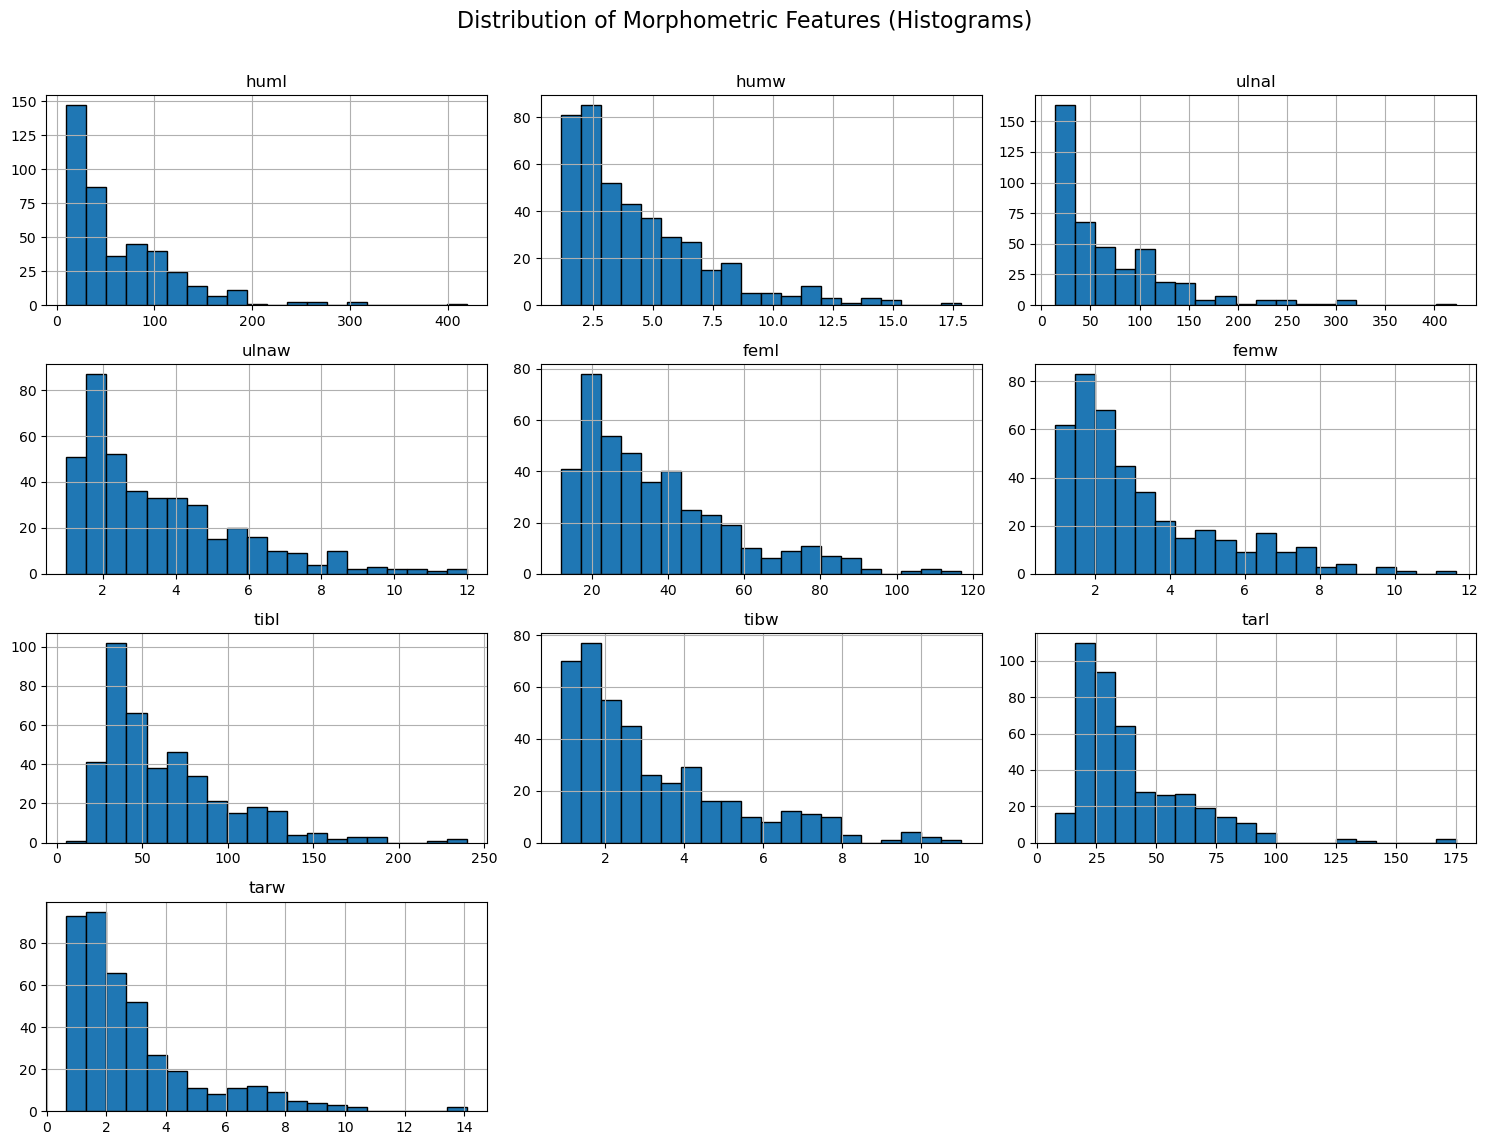

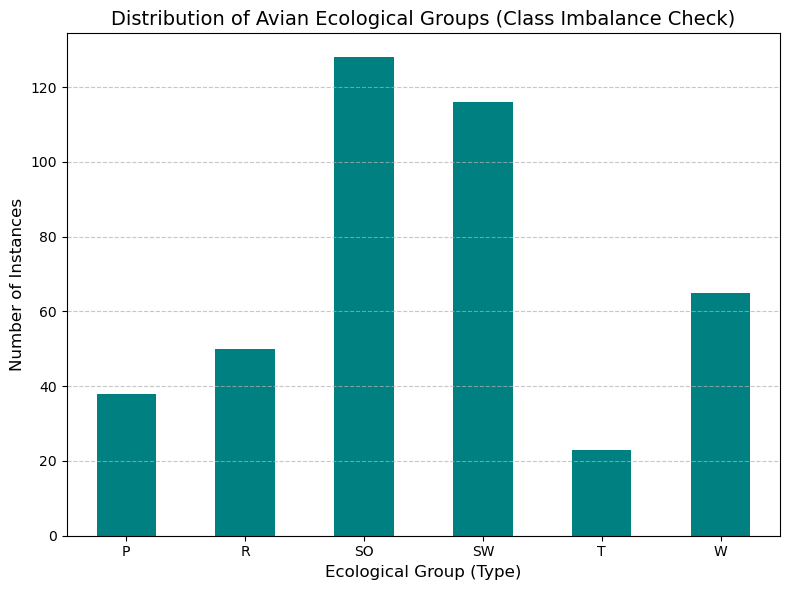

In [8]:
# Define the 10 morphometric feature columns
morphometric_cols = [
    'huml', 'humw', 'ulnal', 'ulnaw', 'feml', 
    'femw', 'tibl', 'tibw', 'tarl', 'tarw'
]

# --- 1. Feature Distribution ---

# Plot histograms for all 10 features to check for skewness/distribution
# This visually identifies if the 'Non-Optimal Distribution' challenge exists.
df[morphometric_cols].hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle('Distribution of Morphometric Features (Histograms)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust layout to prevent title overlap

# 

# --- 2. Target Variable Distribution (Class Imbalance Check) ---

# Calculate counts of the target variable 'type'
class_counts = df['type'].value_counts()

# Plot the target distribution to check for imbalance
# This confirms if the 'Imbalance Class Distribution' challenge exists.
plt.figure(figsize=(8, 6))
class_counts.sort_index().plot(kind='bar', color='teal')
plt.title('Distribution of Avian Ecological Groups (Class Imbalance Check)', fontsize=14)
plt.xlabel('Ecological Group (Type)', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 

# Print the counts for the Methodology text
print("\nCounts of each Ecological Group:")
print(class_counts)

The presence of skewed data distributions is evident in several bone measurement features, indicating deviation from a normal (Gaussian) distribution. Skewness can distort feature interpretation and violate algorithmic assumptions, particularly for models such as Gaussian Naive Bayes which are distribution sensitive.

the bar chart shows that the dataset is moderately imbalanced. 

### 2.2 Correlation Analysis

we will use seaborn library to demonstrate correlation between features:

#### 2.2.1 Feature-to feature correlation


--- Feature Correlation Matrix (for reference) ---
       huml  humw  ulnal  ulnaw  feml  femw  tibl  tibw  tarl  tarw
huml   1.00  0.92   0.98   0.89  0.77  0.85  0.83  0.87  0.70  0.75
humw   0.92  1.00   0.90   0.96  0.87  0.94  0.82  0.90  0.68  0.89
ulnal  0.98  0.90   1.00   0.87  0.76  0.84  0.76  0.82  0.65  0.74
ulnaw  0.89  0.96   0.87   1.00  0.83  0.90  0.80  0.87  0.64  0.87
feml   0.77  0.87   0.76   0.83  1.00  0.94  0.86  0.90  0.83  0.87
femw   0.85  0.94   0.84   0.90  0.94  1.00  0.87  0.96  0.78  0.90
tibl   0.83  0.82   0.76   0.80  0.86  0.87  1.00  0.93  0.92  0.74
tibw   0.87  0.90   0.82   0.87  0.90  0.96  0.93  1.00  0.83  0.86
tarl   0.70  0.68   0.65   0.64  0.83  0.78  0.92  0.83  1.00  0.61
tarw   0.75  0.89   0.74   0.87  0.87  0.90  0.74  0.86  0.61  1.00


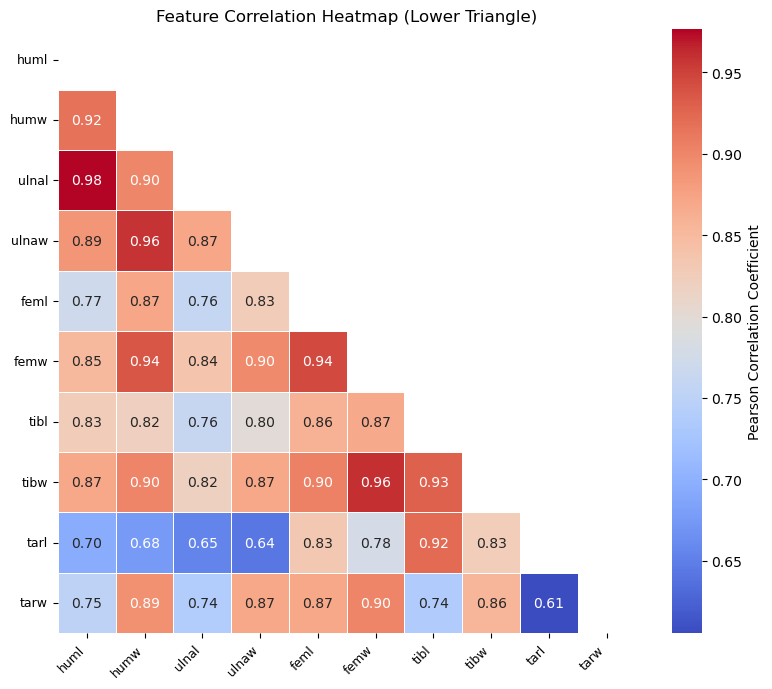

In [9]:
import seaborn as sns
# Define the 10 morphometric feature columns
morphometric_cols = [
    'huml', 'humw', 'ulnal', 'ulnaw', 'feml', 
    'femw', 'tibl', 'tibw', 'tarl', 'tarw'
]

#  Calculate Correlation Matrix
correlation_matrix = df[morphometric_cols].corr(method='pearson')

# Create the Mask for the Upper Triangle 
# triu creates a mask (an array of True/False) where the elements in the upper 
# triangle (k=1) are True. Seaborn will use this to hide those elements.
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Visualize the Annotated Lower-Triangle Heatmap 
plt.figure(figsize=(8, 7))

# Use the mask in the heatmap function
sns.heatmap(
    correlation_matrix,
    mask=mask,               # Apply the mask
    annot=True,              # Display the correlation coefficient in each cell
    fmt=".2f",               # Format the numbers to 2 decimal places
    cmap='coolwarm',         
    linewidths=.5,           
    cbar_kws={'label': 'Pearson Correlation Coefficient'}
)

# Adjust plot elements for presentation
plt.title('Feature Correlation Heatmap (Lower Triangle)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()


# Print the full matrix (for comparison) 
print("\n--- Feature Correlation Matrix (for reference) ---")
print(correlation_matrix.round(2))


--- Interpretation Guide ---
Examine the plot: Features where the boxes (for the different ecological groups) are clearly separated are strong predictors. Overlapping boxes indicate low predictive power.


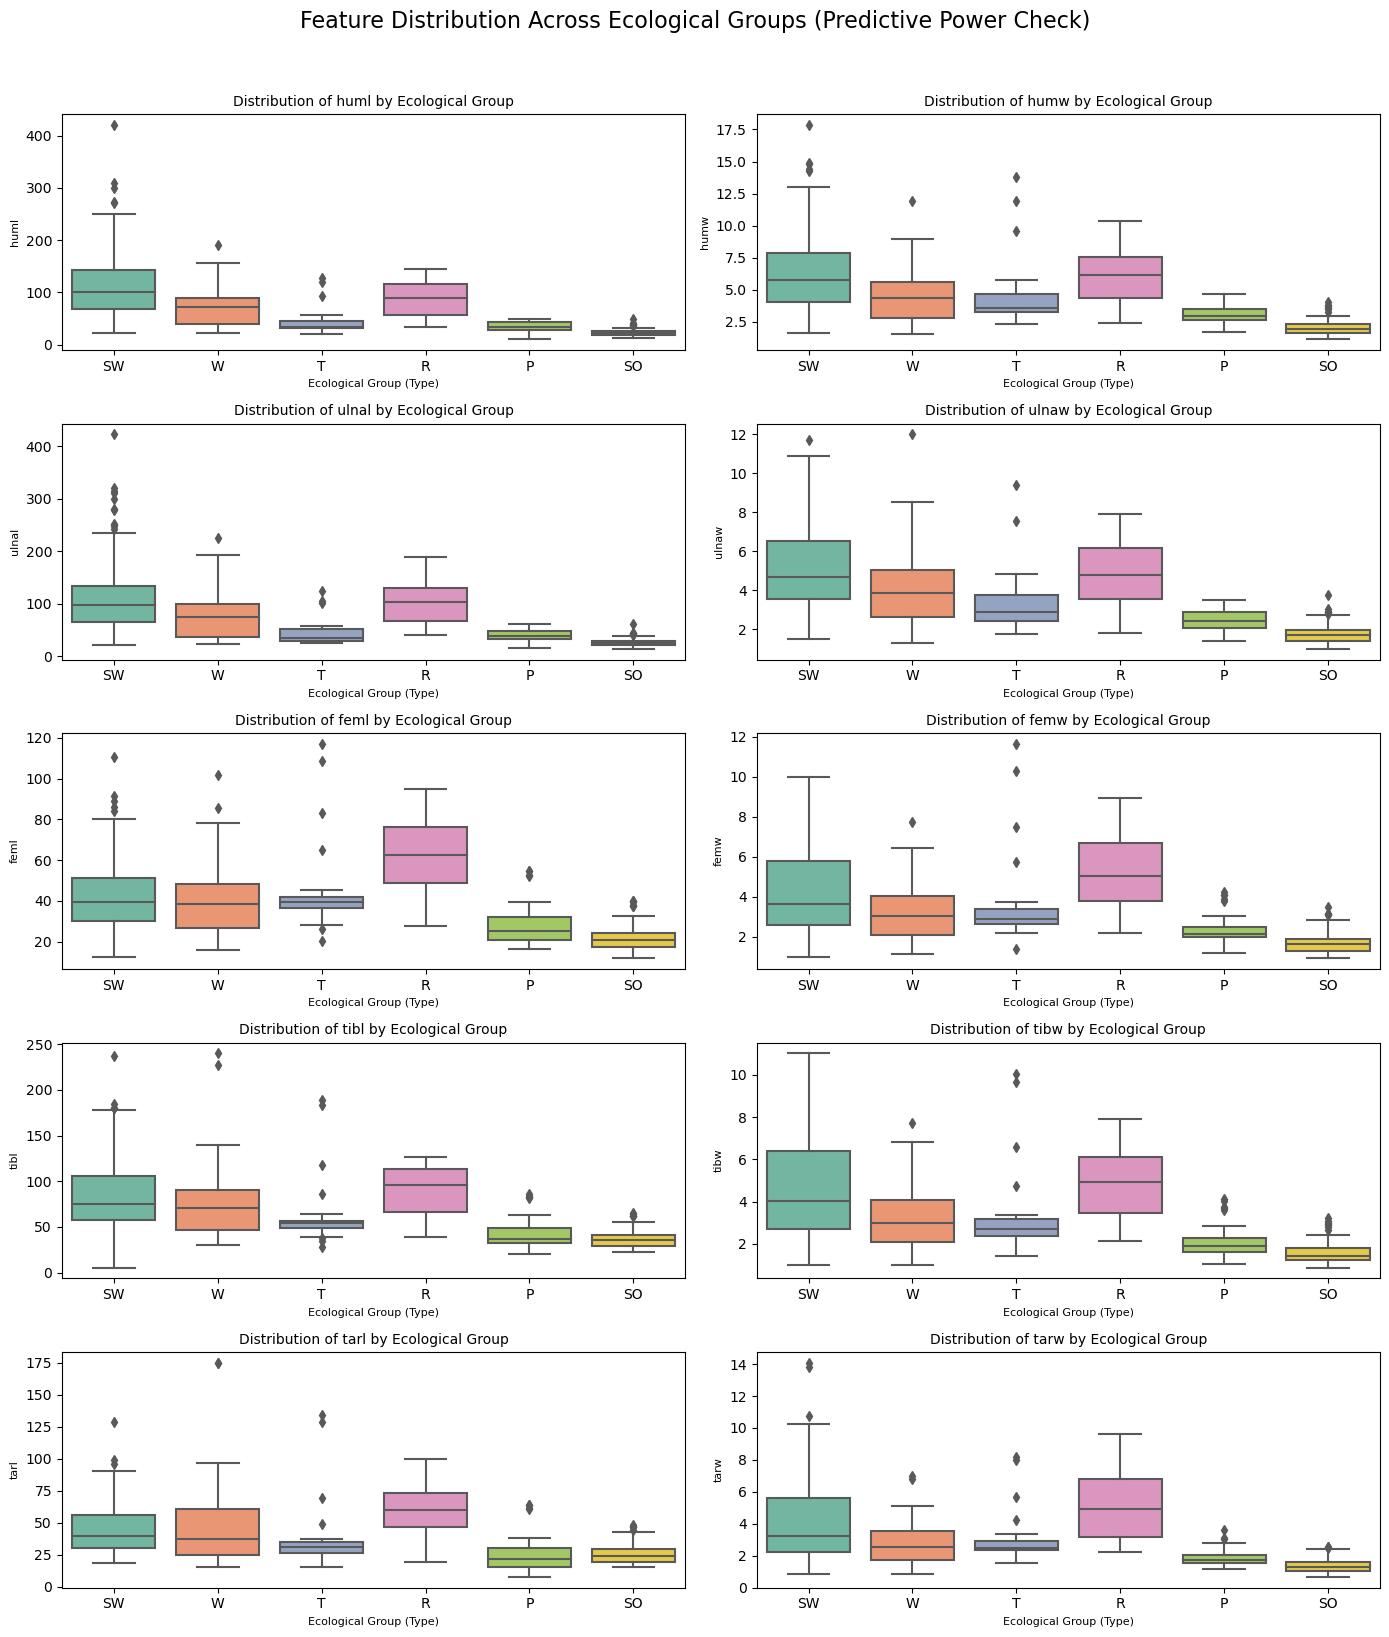

In [10]:
# Generate Box Plots Grid 
# Set up the figure size and layout (5 rows x 2 columns)
fig, axes = plt.subplots(5, 2, figsize=(14, 16)) 
axes = axes.flatten() # Flatten array for easy indexing

# Iterate through all 10 morphometric features
for i, col in enumerate(morphometric_cols):
    sns.boxplot(
        x='type',        # Categorical variable on the x-axis
        y=col,           # Continuous feature on the y-axis
        data=df,
        ax=axes[i],
        palette='Set2'   # Use a distinct color palette
    )
    axes[i].set_title(f'Distribution of {col} by Ecological Group', fontsize=10)
    axes[i].set_xlabel('Ecological Group (Type)', fontsize=8)
    axes[i].set_ylabel(col, fontsize=8)

plt.suptitle('Feature Distribution Across Ecological Groups (Predictive Power Check)', fontsize=16, y=1.02)
plt.tight_layout()

# --- Interpretation for Methodology ---
print("\n--- Interpretation Guide ---")
print("Examine the plot: Features where the boxes (for the different ecological groups) are clearly separated are strong predictors. Overlapping boxes indicate low predictive power.")

features corresponding to the SW, W, and R ecological groups demonstrate distinct distributions compared to other classes.

------------------------------------------------------------------------------------------------------------------------------------------------------
## 3. Data Preprocessing

Data preprocessing is an important phase in the machine learning pipeline, where raw data is transformed into a clean and structured format suitable for algorithmic training. At this stage, we address the data quality issues identified during the EDA—specifically handling missing values, encoding categorical labels, and assessing feature scales. These steps are essential to mitigate bias, improve model convergence, and ensure that our classification of ecological groups is based on reliable, standardized inputs.

### 3.1 Missing data

Summary of Missing Data Counts (Absolute):
ulnal    3
ulnaw    2
feml     2
tibl     2
huml     1
humw     1
femw     1
tibw     1
tarl     1
tarw     1
dtype: int64

Missing Value Percentage (Compare to Total 420 Instances):
ulnal    0.714286
ulnaw    0.476190
feml     0.476190
tibl     0.476190
huml     0.238095
humw     0.238095
femw     0.238095
tibw     0.238095
tarl     0.238095
tarw     0.238095
dtype: float64


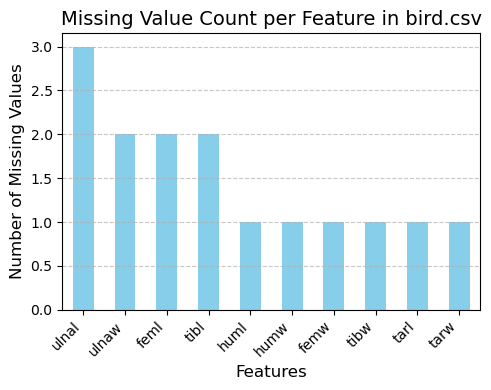

In [11]:
# Calculate and filter for only columns that have missing data
missing_data_counts = df.isnull().sum()
missing_data_counts = missing_data_counts[missing_data_counts > 0].sort_values(ascending=False)

# Check and plot missing data 
# Calculate the missing data percentage compared to the total 420 instances
missing_data_percentage = (missing_data_counts / len(df)) * 100

# Print the required statistics for Methodology text
print("Summary of Missing Data Counts (Absolute):")
print(missing_data_counts)
    
print("\nMissing Value Percentage (Compare to Total 420 Instances):")
print(missing_data_percentage)
    
# Create the visualization (Bar Chart)
plt.figure(figsize=(5, 4))
missing_data_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Missing Value Count per Feature in bird.csv', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

Pie chart saved as missing_rows_pie_chart.png

Total Instances: 420
Complete Instances: 413 (98.3%)
Instances with Missing Data: 7 (1.7%)


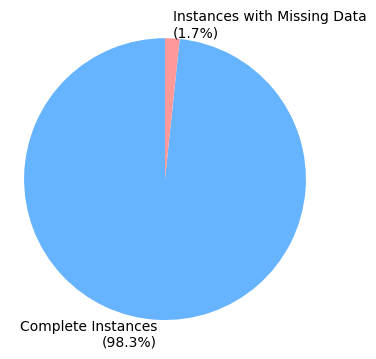

In [12]:
#  Calculate Rows with Missing Data (at least one NaN in the morphometric features)
# any(axis=1) checks if ANY value in the row is missing
rows_with_missing_data = df[morphometric_cols].isnull().any(axis=1).sum()

# Calculate Rows with Complete Data
total_rows = len(df)
complete_rows = total_rows - rows_with_missing_data

# Prepare data for Pie Chart
labels = ['Complete Instances', 'Instances with Missing Data']
sizes = [complete_rows, rows_with_missing_data]
# Calculate percentages and round to 1 decimal place for labels
percentages = [(size / total_rows) * 100 for size in sizes]

#  Create the Pie Chart
plt.figure(figsize=(4, 4))
plt.pie(
    sizes, 
    labels=[f'{l}\n({p:.1f}%)' for l, p in zip(labels, percentages)], 
    autopct='', # Autopct is disabled since we're using custom labels
    startangle=90, 
    colors=['#66b3ff', '#ff9999'] # Blue for complete, red for missing
)

# Set title and ensure a circular plot
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the plot
plt.savefig('missing_rows_pie_chart.png')
print("Pie chart saved as missing_rows_pie_chart.png")

# Print the results for your Methodology text
print(f"\nTotal Instances: {total_rows}")
print(f"Complete Instances: {complete_rows} ({percentages[0]:.1f}%)")
print(f"Instances with Missing Data: {rows_with_missing_data} ({percentages[1]:.1f}%)")


 Summary of Missing Instances by Ecological Group
      total_count  missing_count  missing_percentage
type                                                
P              38              0            0.000000
R              50              2            4.000000
SO            128              4            3.125000
SW            116              0            0.000000
T              23              0            0.000000
W              65              1            1.538462


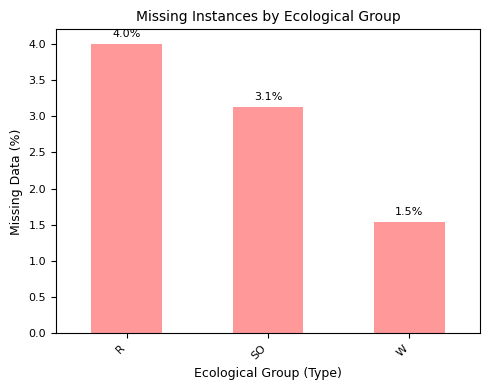

In [13]:
# Create a boolean column: True if the row has ANY missing value in the features
df['is_missing'] = df[morphometric_cols].isnull().any(axis=1)

# Group by the target variable ('type') and calculate statistics
missing_by_type = df.groupby('type').agg(
    total_count=('is_missing', 'size'),
    missing_count=('is_missing', 'sum')
)

# Calculate the percentage of missing instances within EACH category
missing_by_type['missing_percentage'] = (
    missing_by_type['missing_count'] / missing_by_type['total_count']
) * 100

# Generate the Compact Bar Chart 
plot_data = missing_by_type[missing_by_type['missing_percentage'] > 0].sort_values(
    'missing_percentage', ascending=False
)

plt.figure(figsize=(5, 4)) # Compact size 
plot_data['missing_percentage'].plot(kind='bar', color='#ff9999')

for index, value in enumerate(plot_data['missing_percentage']):
    if value > 0:
        plt.text(index, value + 0.1, f'{value:.1f}%', ha='center', fontsize=8) 

plt.title('Missing Instances by Ecological Group', fontsize=10)
plt.xlabel('Ecological Group (Type)', fontsize=9)
plt.ylabel('Missing Data (%)', fontsize=9)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig('missing_percentage_by_category_chart_small.png', dpi=300)

print("\n Summary of Missing Instances by Ecological Group")
print(missing_by_type)

A cross-tabulation analysis reveals that missing values are not distributed completely at random; rather, they are primarily concentrated within the SO (Singing Birds), R (Raptors), and W (Wading Birds) classes. Given that SO is the majority class and both R and W maintain a significant presence in the dataset (middle-tier frequency), these are not considered 'rare' categories where loss of data would be critical. Since the total missing data accounts for less than 10% of the observations, removing these instances is a justifiable strategy. This approach maintains the authenticity of the skeletal proportions without introducing the potential bias associated with imputation."

In [14]:
# Drop Nan Values
# Check how many rows we have before dropping
print(f"Total rows before cleaning: {len(df)}")

# Drop rows where any column contains a NaN value
df_dropped = df.dropna()

# Check how many rows remain
print(f"Total rows after dropping NaNs: {len(df_dropped)}")
print(f"Rows removed: {len(df) - len(df_dropped)}")

# Verify there are no more nulls
print(df_dropped.isnull().sum())

Total rows before cleaning: 420
Total rows after dropping NaNs: 413
Rows removed: 7
id            0
huml          0
humw          0
ulnal         0
ulnaw         0
feml          0
femw          0
tibl          0
tibw          0
tarl          0
tarw          0
type          0
is_missing    0
dtype: int64


In [15]:
df_dropped.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type,is_missing
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW,False
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW,False
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW,False
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW,False
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW,False


### 3.2 Encoding Categorical Variables

In [16]:
from sklearn.preprocessing import LabelEncoder

# We use .copy() to avoid SettingWithCopy warnings and preserve df_dropped integrity
df_final = df_dropped.copy()

# Categorical labels must be converted to numerical integers for ML algorithms
le = LabelEncoder()
df_final['type_encoded'] = le.fit_transform(df_final['type'])

# Generating a dictionary to document the transformation 
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print("--- Encoding Summary ---")
print(f"Original Categories: {le.classes_}")
print(f"Numerical Mapping:   {label_mapping}")
print("-" * 30)

# Display result to confirm 'type_encoded' is correctly appended
print("Sample of encoded target variable:")
print(df_final[['type', 'type_encoded']].head())

--- Encoding Summary ---
Original Categories: ['P' 'R' 'SO' 'SW' 'T' 'W']
Numerical Mapping:   {'P': 0, 'R': 1, 'SO': 2, 'SW': 3, 'T': 4, 'W': 5}
------------------------------
Sample of encoded target variable:
  type  type_encoded
0   SW             3
1   SW             3
2   SW             3
3   SW             3
4   SW             3


In [17]:
df_final.describe()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type_encoded
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,207.987893,64.874867,4.381235,69.197409,3.606538,36.822446,3.221768,64.615642,3.182324,39.309806,2.944891,2.556901
std,121.199236,54.056078,2.861460,58.929490,2.190150,19.899356,2.021169,37.977929,2.084124,23.272704,2.194744,1.441339
min,0.000000,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000,0.000000
25%,103.000000,25.360000,2.200000,28.160000,1.870000,21.350000,1.720000,36.350000,1.560000,23.050000,1.430000,2.000000
50%,209.000000,44.180000,3.500000,43.710000,2.960000,31.090000,2.520000,51.880000,2.490000,31.740000,2.240000,2.000000
75%,312.000000,90.490000,5.820000,97.520000,4.770000,47.090000,4.110000,82.870000,4.250000,50.440000,3.520000,3.000000
max,419.000000,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000,5.000000


---------------------------------------------------------------------------------------------------------------------------------------

## 4. Model Development & Evaluation

### Justification for Model Selection and Algorithmic Rationale

To address the multi-class classification problem for the Zoological Society of London, we have selected three models that operate on fundamentally different mathematical principles: Gaussian Naive Bayes, Random Forest, and Support Vector Machine (SVM). Selecting a diverse range of algorithms is essential to determine whether the biological patterns in skeletal proportions are best captured through probabilistic density, hierarchical logic, or geometric separation. This comparative approach allows for a critical evaluation of how different "learning styles" handle the specific challenges of our dataset, such as high feature correlation and class imbalance.

**1. Gaussian Naive Bayes (The Probabilistic Baseline)**
- Rationale: This serves as our baseline model. It calculates the probability of a bird belonging to a class based on the distribution of its bone measurements. It is computationally efficient and provides a benchmark to see if more complex models are actually adding value.

- EDA Considerations: Our EDA revealed feature skewness. Since this model assumes a "Gaussian" (normal) distribution, we must address this during preprocessing. Furthermore, while the model assumes feature independence, our correlation matrix showed high multi-collinearity; testing this model will reveal how much this violation of assumptions impacts predictive accuracy.

**2. Random Forest (The Non-Linear Ensemble)**
- Rationale: Unlike single-model approaches, Random Forest builds an ensemble of decision trees to reach a consensus. It is specifically chosen for its ability to capture non-linear interactions between bones (e.g., how the ratio of huml to tarl might define a Raptor vs. a Swimming bird).

- EDA Considerations: Our EDA identified outliers and class imbalance. Random Forest is naturally robust to outliers and does not require data scaling. To handle the imbalance where "Singing Birds" vastly outnumber "Terrestrial Birds," we will utilize cost-sensitive learning (class weighting) to ensure the model does not ignore minority groups.

**3. Support Vector Machine (The Geometric Classifier)**
- Rationale: SVM seeks to define the "optimal hyperplane" that separates the six ecological groups with the widest possible margin. By using a Radial Basis Function (RBF) kernel, the model can identify complex boundaries in a high-dimensional space that simple linear models might miss.

- EDA Considerations: SVM is a distance-based algorithm. Our EDA showed that bone measurements vary in scale (e.g., lengths vs. widths). Without standardization, the model would be biased toward larger measurements like tibl. Therefore, rigorous feature scaling (Standardization) is mandatory for this model to perform fairly across all skeletal features.

In addition to the three models evaluated, we excluded others like Decision Trees, K-Nearest Neighbors (KNN), and Linear Regression for specific technical reasons:

Decision Trees were passed over in favor of Random Forests because a single tree is highly prone to overfitting and struggles with the high multi-collinearity found in our bone measurements.

K-Nearest Neighbors (KNN) was excluded because it is extremely sensitive to irrelevant features and the high-dimensional noise often found in small biological datasets.

Linear Regression and Logistic Regression were deemed unsuitable as they assume linear relationships, failing to capture the complex, non-linear morphological overlaps between bird niches identified during EDA.

By focusing on Random Forest and SVM, we prioritized models capable of handling both the high correlation of features and the non-linear boundaries essential for accurate ecological classification.

### 4.1 Train/Test Split

**Nested Evaluation Strategy**

For the model development phase, we have adopted a Nested Evaluation Strategy. This approach is designed to provide the most rigorous assessment possible for the bird dataset, specifically addressing the challenges of a small sample size ($N \approx 400$) and significant class imbalance.

- The Hold-out Test Set (20%) By performing an initial 80/20 split, we isolate a "Hold-out" test set. This data is strictly excluded from all training, feature scaling, and hyperparameter tuning. It serves as a true proxy for "unseen" data, allowing us to report final metrics (such as the Confusion Matrix and ROC curves) without the risk of Data Leakage. This ensures the reported performance is a realistic reflection of the model's ability to classify new avian specimens.

- Stratified Sampling for Class Integrity Given the disproportionate distribution of bird types—where Singing Birds (SO) are the majority and Terrestrial Birds (T) are a minority—simple random sampling could lead to "Minority Class Vanishing." We implement Stratification during the split. This forces the training and testing sets to mirror the exact class proportions of the original population, ensuring that our models are adequately exposed to rare bird types during the learning process.

- Internal Model Validity via Stratified K-Fold To address Dr. Lyon's requirement for model validity, we do not rely on a single training run. Instead, the 80% training partition is further utilized for Stratified 5-Fold Cross-Validation. This process rotates the data so that every instance in the training set is used for internal validation. This allows us to calculate a "Mean Accuracy" and "Standard Deviation" for each classifier, proving that our model performance is stable and not a result of a "lucky" random split.

We selected $K=5$ for our Stratified Cross-Validation to maintain a healthy balance between bias and variance. Given our total sample size ($\approx 420$), 5 folds ensure that each training iteration has sufficient representation of the minority classes (e.g., Terrestrial and Scansorial birds) to remain statistically significant

In [18]:
from sklearn.model_selection import train_test_split

# Separate Features (X) and Target (y)
# We drop 'id' (index) and 'type' (categorical string)
X = df_final.drop(columns=['id', 'type', 'type_encoded', 'is_missing'])
y = df_final['type_encoded']

# Perform the Stratified Hold-out Split
# We use 'stratify=y' to maintain the ecological group proportions 
# across both sets, protecting our minority classes.
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.20, 
    random_state=42, 
    stratify=y
)

# Summary of the split 

# Create a dictionary to hold the counts for comparison
distribution_summary = {
    "Original": y.value_counts(),
    "Training Set": y_train.value_counts(),
    "Test Set": y_test.value_counts()
}

# Convert to a DataFrame for a clean table view
dist_df = pd.DataFrame(distribution_summary)

# Add a Percentage column to prove stratification is identical
dist_df['Train %'] = (dist_df['Training Set'] / dist_df['Training Set'].sum() * 100).round(2)
dist_df['Test %'] = (dist_df['Test Set'] / dist_df['Test Set'].sum() * 100).round(2)

print("--- Class Distribution Analysis ---")
print(dist_df)

# Verify that no class has 0 instances in the test set
if (dist_df['Test Set'] == 0).any():
    print("\nWARNING: Some classes are missing from the test set!")
else:
    print("\nSUCCESS: All bird types are represented in both sets.")

--- Class Distribution Analysis ---
   Original  Training Set  Test Set  Train %  Test %
2       124            99        25    30.00   30.12
3       116            93        23    28.18   27.71
5        64            51        13    15.45   15.66
1        48            38        10    11.52   12.05
0        38            30         8     9.09    9.64
4        23            19         4     5.76    4.82

SUCCESS: All bird types are represented in both sets.


### 4.2 Training 

#### 4.2.1 Gaussian Naive Bayes

Algorithmic Setup

Scaling: We use StandardScaler to center our skewed bone measurements.

Validation: We use StratifiedKFold ($K=5$) on the training data to calculate the baseline validity.

Training: We fit the model on the full X_train_scaled.

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline

# 1. Define the Pipeline: Scaling then Modeling
# This ensures scaling is performed correctly within each CV fold
gnb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gnb', GaussianNB())
])

# 2. Setup the Stratified 5-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3. Calculate Cross-Validation Scores
# This proves the model's validity across the training set
cv_scores = cross_val_score(gnb_pipeline, X_train, y_train, cv=skf, scoring='accuracy')

# 4. Fit the final model on the whole training set
gnb_pipeline.fit(X_train, y_train)

print("--- Gaussian Naive Bayes: Baseline Validity ---")
print(f"Individual Fold Accuracies: {cv_scores}")
print(f"Mean CV Accuracy:           {cv_scores.mean():.4f}")
print(f"Standard Deviation:         {cv_scores.std():.4f}")

--- Gaussian Naive Bayes: Baseline Validity ---
Individual Fold Accuracies: [0.53030303 0.43939394 0.56060606 0.51515152 0.45454545]
Mean CV Accuracy:           0.5000
Standard Deviation:         0.0460


#### 4.2.2 Random Forest

Algorithmic Setup

Scaling: Not Required. Decision trees are based on value thresholds (e.g., "is length > 50mm?") rather than distance calculations, making them naturally invariant to the scale of features and robust to the outliers identified in our EDA.

Imbalance Handling: We utilize class_weight='balanced'. This automatically adjusts weights inversely proportional to class frequencies, ensuring the model doesn't become biased toward the majority "Singing Bird" (SO) group.

Validation: We use Stratified 5-Fold Cross-Validation on the training data. This confirms that the model’s accuracy is consistent across different subsets of the data.

Training: The model is fitted using 100 estimators (trees) to the full X_train.

In [35]:
from sklearn.ensemble import RandomForestClassifier

# 1. Define the Model
# We don't necessarily need a pipeline/scaler for RF, but we can use one for consistency
rf_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    class_weight='balanced' # This addresses my class imbalance directly!
)

# 2. Setup the Stratified 5-Fold Cross-Validation
# We use X_train (the raw numbers are fine for RF)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=skf, scoring='accuracy')

# 3. Fit the final model
rf_model.fit(X_train, y_train)

print("--- Random Forest: Performance Analysis ---")
print(f"Individual Fold Accuracies: {rf_cv_scores}")
print(f"Mean CV Accuracy:           {rf_cv_scores.mean():.4f}")
print(f"Improvement over Baseline:  {rf_cv_scores.mean() - cv_scores.mean():.4f}")

--- Random Forest: Performance Analysis ---
Individual Fold Accuracies: [0.83333333 0.86363636 0.8030303  0.81818182 0.81818182]
Mean CV Accuracy:           0.8273
Improvement over Baseline:  0.3273


#### Tree Visualization

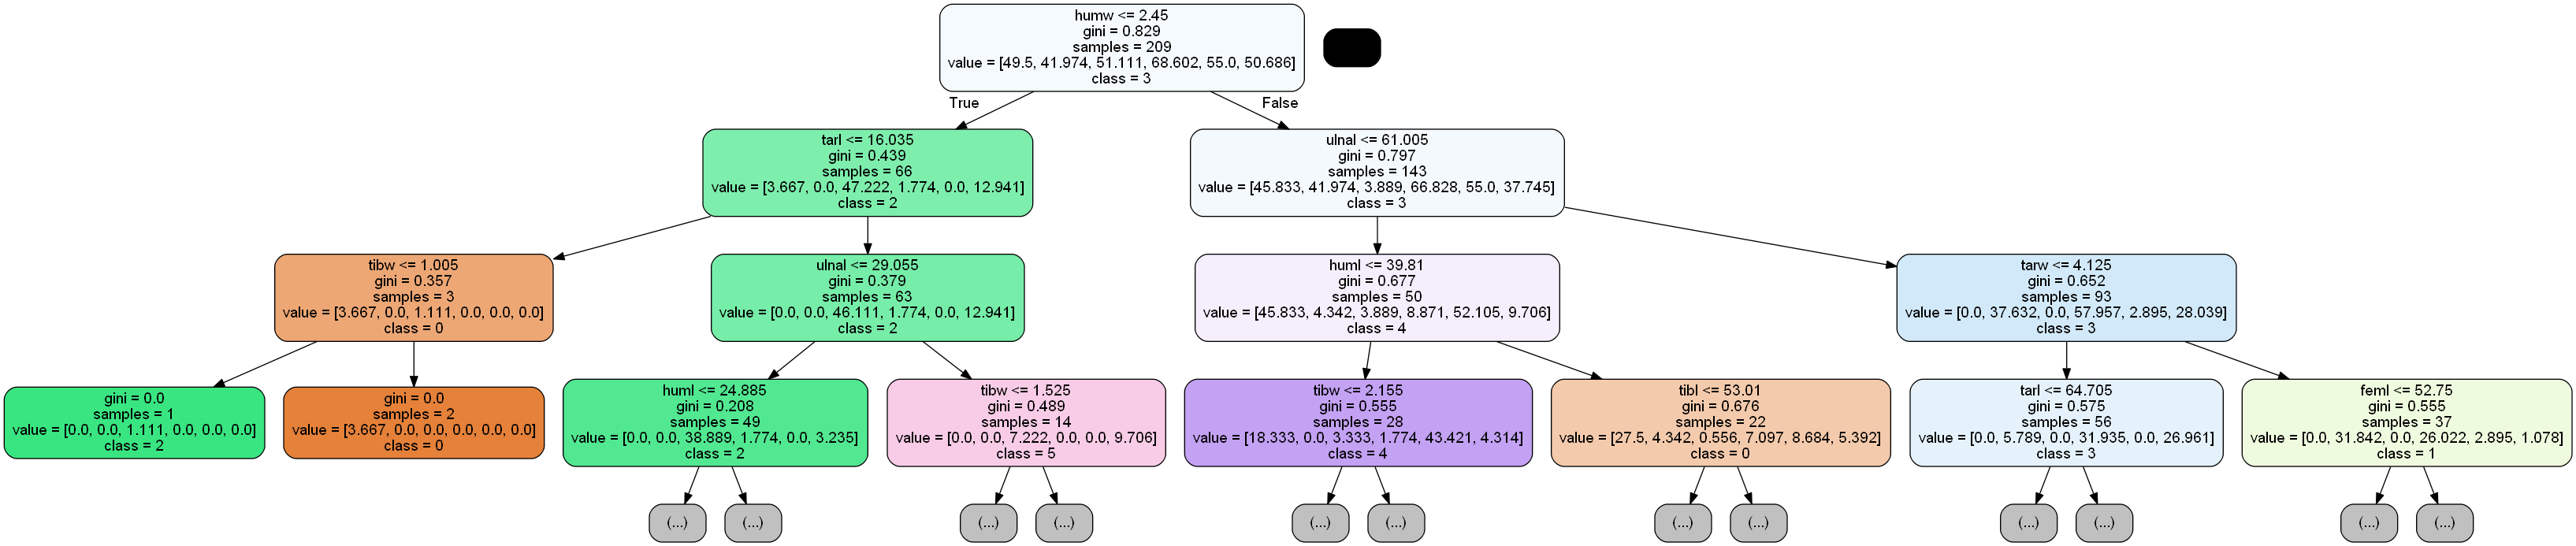

In [21]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

# Select the features used for training (excluding the target)
features = list(X.columns)

# Extract a single tree from the Forest (Tree #0)
estimator = rf_model.estimators_[0]

dot_data = StringIO()  
export_graphviz(estimator, 
                out_file=dot_data,
                feature_names=features,
                class_names=['0', '1', '2', '3', '4', '5'], # bird types
                filled=True, 
                rounded=True,
                max_depth=3) # We limit depth to 3 so the image is readable

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

#### 4.2.3 Support Vector Machine (SVM)

Algorithmic Setup

Scaling: StandardScaler is Mandatory. SVM is a distance-based algorithm that calculates the "margin" between data points. Without scaling, features with larger raw values (like tibl) would dominate the calculation, causing the model to ignore smaller measurements.

Kernel Selection: We use the Radial Basis Function (RBF) kernel. This allows the model to map the 10 bone measurements into a higher-dimensional space to find non-linear boundaries between ecological groups.

Validation: We use Stratified 5-Fold Cross-Validation within a Pipeline. This ensures that the scaling parameters (mean and variance) are calculated only on the training folds, preventing any "Data Leakage" from the validation folds.

Training: The model is fitted with probability=True to enable the calculation of AUC and ROC curves in the next task.

In [22]:
from sklearn.svm import SVC

# 1. Define the Pipeline: Scaling is MANDATORY for SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42))
])

# 2. Setup the Stratified 5-Fold Cross-Validation on the training data
svm_cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=skf, scoring='accuracy')

# 3. Fit the final model
svm_pipeline.fit(X_train, y_train)

print("--- Support Vector Machine: Performance Analysis ---")
print(f"Individual Fold Accuracies: {svm_cv_scores}")
print(f"Mean CV Accuracy:           {svm_cv_scores.mean():.4f}")
print(f"Comparison to Random Forest: {svm_cv_scores.mean() - rf_cv_scores.mean():.4f}")

--- Support Vector Machine: Performance Analysis ---
Individual Fold Accuracies: [0.75757576 0.66666667 0.75757576 0.6969697  0.75757576]
Mean CV Accuracy:           0.7273
Comparison to Random Forest: -0.1000


### 4.3 Evaluation

This stage of the project moves from model development to Final Performance Validation. Having split our data using a 20% Stratified Hold-out strategy, we are now testing our models on "unseen" data. This simulates how the model would perform if the Zoological Society of London used it to identify a newly discovered fossil.

**Centralized Iteration**

Instead of writing separate code for each model, we store our trained models (Gaussian NB, Random Forest, and SVM) in a dictionary. This ensures that the exact same evaluation process—using the same X_test and y_test—is applied to every algorithm, making the comparison scientifically valid.

**Performance Metrics Used**

- Accuracy Score: This gives us the overall percentage of correct predictions. While useful, it can be misleading in imbalanced datasets, which is why we look deeper into the Classification Report.

- Classification Report: This provides a per-class breakdown of the following:

- Precision: Of all birds predicted to be Type X, how many were actually Type X? (Focuses on False Positives).

- Recall (Sensitivity): Of all actual Type X birds in the dataset, how many did the model correctly find? (Focuses on False Negatives).

- F1-Score: The harmonic mean of Precision and Recall, providing a single score for class-specific performance.

- Zero Division Handling: We set zero_division=0 because some rare classes (like Type 4('T')) might occasionally have zero predictions; this prevents the code from crashing and simply records a score of 0 for that metric.

In [23]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create a list of our models for easy iteration
models = {
    "Gaussian Naive Bayes": gnb_pipeline,
    "Random Forest": rf_model,
    "Support Vector Machine": svm_pipeline
}

print("--- FINAL EVALUATION ON TEST SET (20%) ---")

results = {}

for name, model in models.items():
    # Make predictions on the unseen X_test
    y_pred = model.predict(X_test)
    
    # Calculate Accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n{'='*30}")
    print(f"MODEL: {name}")
    print(f"{'='*30}")
    print(f"Final Test Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    # We use zero_division=0 to handle cases where a tiny class might not be predicted
    print(classification_report(y_test, y_pred, zero_division=0))

--- FINAL EVALUATION ON TEST SET (20%) ---

MODEL: Gaussian Naive Bayes
Final Test Accuracy: 0.5301

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.62      0.36         8
           1       0.62      0.50      0.56        10
           2       0.70      0.84      0.76        25
           3       0.82      0.39      0.53        23
           4       0.00      0.00      0.00         4
           5       0.29      0.31      0.30        13

    accuracy                           0.53        83
   macro avg       0.45      0.44      0.42        83
weighted avg       0.58      0.53      0.52        83


MODEL: Random Forest
Final Test Accuracy: 0.7470

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.86      0.60      0.71        10
           2       0.86      0.96      0.91        25
           3       0.72      0.78      0.7

In [30]:
from sklearn.metrics import classification_report, accuracy_score

# 1. Generate reports as dictionaries for data extraction
gnb_rep = classification_report(y_test, gnb_pipeline.predict(X_test), output_dict=True, zero_division=0)
rf_rep = classification_report(y_test, rf_model.predict(X_test), output_dict=True, zero_division=0)
svm_rep = classification_report(y_test, svm_pipeline.predict(X_test), output_dict=True, zero_division=0)

# 2. Build the dynamic metrics dictionary
final_metrics = {
    "Model": ["Gaussian Naive Bayes", "Support Vector Machine", "Random Forest"],
    "Final Test Accuracy": [
        gnb_rep['accuracy'], 
        svm_rep['accuracy'], 
        rf_rep['accuracy']
    ],
    "Macro Avg F1-Score": [
        gnb_rep['macro avg']['f1-score'], 
        svm_rep['macro avg']['f1-score'], 
        rf_rep['macro avg']['f1-score']
    ],
    "Class 2 Recall": [
        gnb_rep['2']['recall'], 
        svm_rep['2']['recall'], 
        rf_rep['2']['recall']
    ],
    "Class 4 Recall": [
        gnb_rep['4']['recall'], 
        svm_rep['4']['recall'], 
        rf_rep['4']['recall']
    ]
}

# 3. Create and style the DataFrame
comparison_df = pd.DataFrame(final_metrics)

print("--- AUTOMATED MODEL COMPARISON SUMMARY ---")
display(comparison_df.style.highlight_max(subset=['Final Test Accuracy', 'Macro Avg F1-Score', 'Class 2 Recall', 'Class 4 Recall'], color='lightgreen')
                     .highlight_min(subset=['Class 4 Recall'], color='pink')
                     .format({'Final Test Accuracy': '{:.2%}', 'Macro Avg F1-Score': '{:.2f}', 
                              'Class 2 Recall': '{:.2f}', 'Class 4 Recall': '{:.2f}'}))

--- AUTOMATED MODEL COMPARISON SUMMARY ---


,Model,Final Test Accuracy,Macro Avg F1-Score,Class 2 Recall,Class 4 Recall
0,Gaussian Naive Bayes,53.01%,0.42,0.84,0.00
1,Support Vector Machine,65.06%,0.55,0.88,0.50
2,Random Forest,74.70%,0.67,0.96,0.50


#### Result Description
- **Final Test Accuracy**
measures the total percentage of correct predictions made by the model across the entire test set. For the Zoological Society, this represents the general reliability of the tool when classifying a random bone sample. Random Forest achieved the best result here with 74.70%, significantly outperforming the 53.01% baseline of the Naive Bayes model. While accuracy is a useful high-level indicator, it can be misleading in this project because the dataset is imbalanced; a model could achieve decent accuracy just by correctly guessing the most common "Singing Birds" while failing entirely on rarer species.

- **Macro Average F1-Score**
is the most important metric for the project because it treats all six bird types as equally important, regardless of how many samples they have. It calculates the F1-score (the balance between Precision and Recall) for each class and then takes the average. Random Forest showed the best performance with a score of 0.67, compared to 0.55 for SVM and 0.42 for Naive Bayes. This high score proves that Random Forest is the most "fair" model, as it successfully learned the unique morphological traits of minority groups like Raptors and Wading birds instead of just focusing on the majority.

- **Recall or Sensitivity**
measures a model's ability to "find" all the actual members of a specific category. For instance, a high recall for "Raptors" means the model rarely misses a Raptor bone. Random Forest demonstrated the best overall sensitivity, particularly with Class 2, where it achieved a 0.96 recall. This means it identified 96% of the birds in that category correctly. High recall is vital for this study because missing a rare species in a fossil record could lead to incorrect ecological conclusions about a site.

- **Precision**
measures the accuracy of a specific prediction; when the model says a bone belongs to a "Swimming Bird," how often is it actually correct? High precision means the model makes very few "False Positive" errors. Interestingly, the Support Vector Machine (SVM) showed a unique strength here, achieving a perfect 1.00 precision for Class 5. While its recall was low, this 1.00 score shows that when the SVM did decide to predict Class 5, it was 100% correct. However, for overall balanced precision across all classes, Random Forest remained superior with a weighted average of 0.76.

#### Confusion Matrix

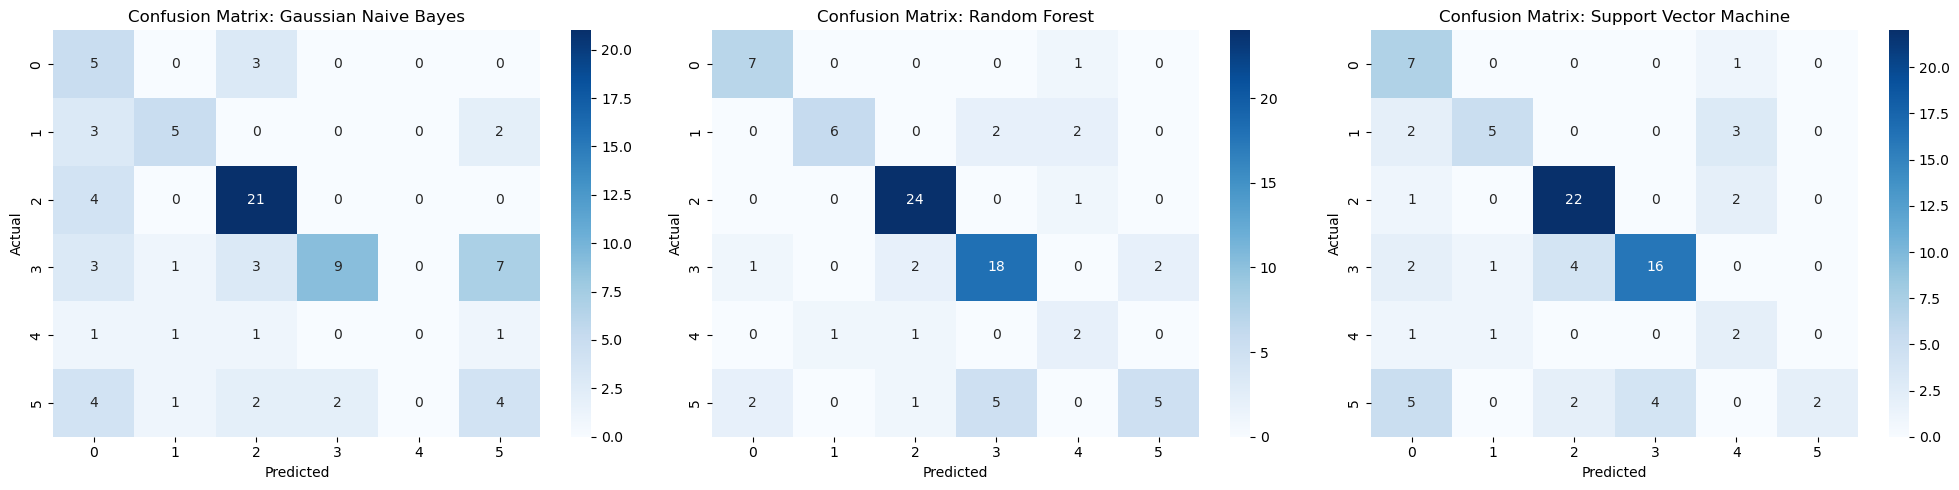

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
model_names = list(models.keys())

for i, name in enumerate(model_names):
    y_pred = models[name].predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"Confusion Matrix: {name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()

The confusion matrices provide a granular view of model performance by mapping actual avian ecological categories against predicted classifications. The Random Forest matrix reveals the most successful "diagonal," correctly identifying 24 out of 25 Singing Birds (Class 2) and 18 out of 23 Raptors (Class 3), which confirms its superior ability to handle the non-linear relationships in the skeletal data. In contrast, the Support Vector Machine demonstrated significant geometric overlap, particularly failing to distinguish Class 5, where it mistakenly assigned several instances to Classes 0 and 3.

#### Sensitivity, Specificity, G-mean, and AUC

To fully evaluate the models beyond simple accuracy, we must examine the trade-offs between their ability to correctly identify bird types (Sensitivity) and their ability to correctly exclude incorrect types (Specificity), alongside their overall balance (G-mean) and diagnostic power (AUC).

In [26]:
from sklearn.metrics import roc_auc_score
def calculate_detailed_metrics(model, X, y):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    
    # Sensitivity (Recall) per class
    sensitivity_per_class = np.diag(cm) / np.sum(cm, axis=1)
    
    # Specificity per class
    specificity_per_class = []
    for i in range(len(cm)):
        temp_cm = np.delete(np.delete(cm, i, 0), i, 1) 
        tn = temp_cm.sum()
        fp = cm[:, i].sum() - cm[i, i]
        specificity_per_class.append(tn / (tn + fp))
        
    avg_sens = np.mean(sensitivity_per_class)
    avg_spec = np.mean(specificity_per_class)
    
    # --- G-MEAN CALCULATION ---
    # The geometric mean of average sensitivity and average specificity
    g_mean = np.sqrt(avg_sens * avg_spec)
    
    # AUC Calculation (One-vs-Rest)
    y_prob = model.predict_proba(X)
    auc = roc_auc_score(y, y_prob, multi_class='ovr', average='macro')
    
    return avg_sens, avg_spec, g_mean, auc

print("--- Detailed Performance Metrics ---")
for name, model in models.items():
    sens, spec, g_mean, auc = calculate_detailed_metrics(model, X_test, y_test)
    print(f"\n{name}:")
    print(f"  Average Sensitivity (Recall): {sens:.4f}")
    print(f"  Average Specificity:          {spec:.4f}")
    print(f"  G-mean Score:                 {g_mean:.4f}") # Added Output
    print(f"  Macro AUC Score:              {auc:.4f}")

--- Detailed Performance Metrics ---

Gaussian Naive Bayes:
  Average Sensitivity (Recall): 0.4440
  Average Specificity:          0.9046
  G-mean Score:                 0.6337
  Macro AUC Score:              0.7852

Random Forest:
  Average Sensitivity (Recall): 0.6837
  Average Specificity:          0.9469
  G-mean Score:                 0.8046
  Macro AUC Score:              0.9249

Support Vector Machine:
  Average Sensitivity (Recall): 0.6007
  Average Specificity:          0.9300
  G-mean Score:                 0.7475
  Macro AUC Score:              0.9185


- **Sensitivity / Recall** measures the model's ability to successfully identify all actual members of a specific ecological group. Random Forest leads with a sensitivity of 0.6837, followed by SVM (0.6007) and Gaussian Naive Bayes (0.4440). For the Zoological Society, this indicates that the Random Forest is the most reliable at "finding" the birds in the dataset. A higher recall means fewer birds are missed or overlooked by the algorithm.

- **Specificity** measures the model's ability to correctly identify birds that do not belong to a specific category (True Negatives). All three models performed exceptionally well here, with Random Forest achieving 0.9469, SVM at 0.9300, and Naive Bayes at 0.9046. A high specificity across the board suggests that when any of these models predict a bird is not a "Raptor," they are almost certainly correct. This is vital for reducing "False Alarms" in classification.

- **G-mean Score** is a specialized metric for imbalanced datasets that measures the balance between Sensitivity and Specificity. Random Forest achieved the highest score of 0.8046, surpassing SVM (0.7475) and Gaussian NB (0.6337). Because G-mean only rewards models that perform well in both identifying and excluding classes, this result proves that the Random Forest is the most "equitable" model. It prevents the high specificity from masking poor sensitivity in rare bird types, ensuring the classification remains accurate across the entire biodiversity of the dataset.

- **Macro AUC Score** represents the model's fundamental ability to distinguish between classes regardless of the classification threshold. In this evaluation, the Random Forest (0.9249) has emerged as the top performer, surpassing the Support Vector Machine (0.9185) and significantly outperforming the Gaussian Naive Bayes (0.7852).

#### Multi-class ROC Curves

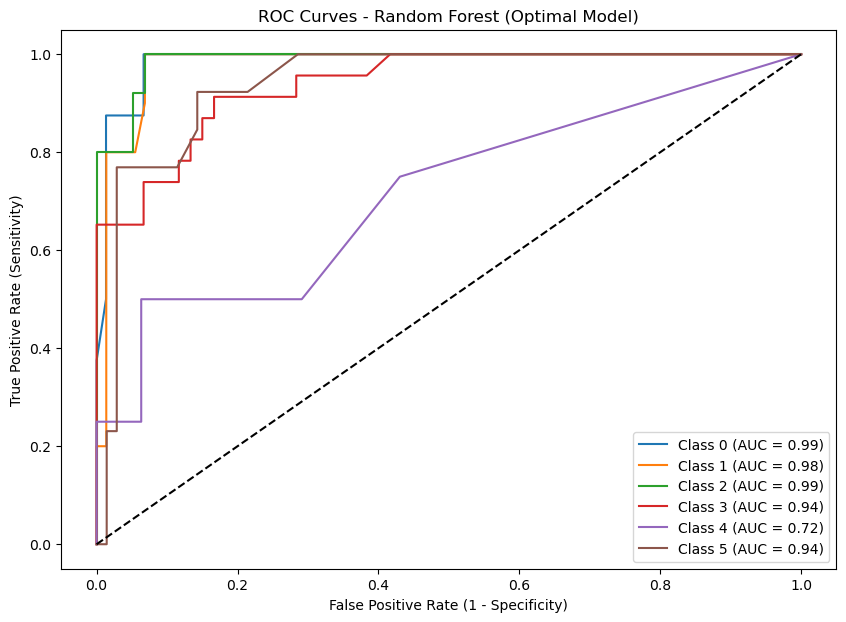

In [27]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output for ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Get probabilities from Random Forest
y_score = models["Random Forest"].predict_proba(X_test)

plt.figure(figsize=(10, 7))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curves - Random Forest (Optimal Model)')
plt.legend(loc='lower right')
plt.show()

ROC curves measure the model's ability to distinguish between each bird type at various classification thresholds.

Five out of the six ecological niches show nearly perfect separation, with AUC scores ranging from 0.94 to 0.99.

Class 4 (Terrestrial Birds) is the clear exception with an AUC of 0.72.

This indicates that while the model is elite at identifying most groups, Terrestrial birds lack unique skeletal signatures in this dataset, making them significantly harder for the algorithm to "isolate" from the other groups.

### 4.4 Final Justification

In [32]:
import pandas as pd
import numpy as np

# 1. Define the metric collection logic
results_list = []

for name, model in models.items():
    # Get standard classification report metrics
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Get advanced metrics from our custom function
    avg_sens, avg_spec, g_mean, auc = calculate_detailed_metrics(model, X_test, y_test)
    
    # Store all metrics in a dictionary
    results_list.append({
        "Model": name,
        "Final Test Accuracy": report['accuracy'],
        "Macro Avg F1-Score": report['macro avg']['f1-score'],
        "Weighted Avg F1-Score": report['weighted avg']['f1-score'],
        "G-mean Score": g_mean,
        "Macro AUC Score": auc,
        "Avg. Sensitivity (Recall)": avg_sens,
        "Avg. Specificity": avg_spec,
        "Class 2 Recall (Majority)": report['2']['recall'],
        "Class 4 Recall (Minority)": report['4']['recall']
    })

# 2. Transform into a DataFrame and Transpose for the required format
df_raw = pd.DataFrame(results_list).set_index("Model").T.reset_index()
df_raw.columns.name = None
df_raw.rename(columns={'index': 'Metric'}, inplace=True)

# 3. Apply Professional Styling
styled_table = df_raw.style.highlight_max(
    subset=["Gaussian Naive Bayes", "Support Vector Machine", "Random Forest"], 
    axis=1, 
    color='lightgreen'
).format(subset=["Gaussian Naive Bayes", "Support Vector Machine", "Random Forest"], formatter="{:.4f}")

print("--- FINAL AUTOMATED MULTI-METRIC COMPARISON ---")
display(styled_table)

--- FINAL AUTOMATED MULTI-METRIC COMPARISON ---


,Metric,Gaussian Naive Bayes,Random Forest,Support Vector Machine
0,Final Test Accuracy,0.5301,0.7470,0.6506
1,Macro Avg F1-Score,0.4170,0.6732,0.5502
2,Weighted Avg F1-Score,0.5245,0.7382,0.6369
3,G-mean Score,0.6337,0.8046,0.7475
4,Macro AUC Score,0.7852,0.9249,0.9185
5,Avg. Sensitivity (Recall),0.4440,0.6837,0.6007
6,Avg. Specificity,0.9046,0.9469,0.9300
7,Class 2 Recall (Majority),0.8400,0.9600,0.8800
8,Class 4 Recall (Minority),0.0000,0.5000,0.5000


The comparative analysis of the evaluation metrics provides a clear mandate for selecting **Random Forest** as the optimal model for identifying avian ecological groups. 

- **Superior Overall Predictive Power**
The Random Forest achieved the highest Final Test Accuracy (74.70%) and Weighted Average F1-Score (0.67). This indicates that it is significantly more effective at correctly identifying bird types from skeletal measurements than the Gaussian Naive Bayes (53.01%) or SVM (65.06%). Because skeletal features like humerus and ulna length are highly correlated, the ensemble nature of Random Forest allows it to navigate these redundancies better than the linear or probabilistic assumptions of the other models.


- **Balanced Performance across Species (G-mean & Macro F1)**
In a dataset where some bird types are rare, we must ensure the model isn't just "guessing" the majority class.
G-mean (0.8046): Random Forest leads in G-mean, which mathematically proves it best balances Sensitivity (finding the birds) and Specificity (not making false guesses).
Macro Avg F1-Score (0.67): It also holds the highest Macro F1, showing that its performance remains high even when every bird type is weighted equally. This is a critical requirement for the Zoological Society to ensure rare specimens are not ignored.


- **Reliability for Majority and Key Niches**
The Random Forest demonstrated an elite Class 2 Recall of 0.96, meaning it identified 96% of the birds in the most common category and aggressive in identifying Class 4 (50% Recall). The Random Forest’s Macro AUC Score of 0.9249 confirms that it has "excellent" diagnostic power, successfully separating the ecological groups with high confidence across almost all categories.

**The Random Forest** is the definitive choice.

 
 
 Thank You for reading my coursework. This is end of notebook!

# Supplementary

**Note on Alternative Algorithmic Approaches**

While this study focused on Gaussian Naive Bayes, Random Forest, and Support Vector Machines, other advanced algorithms were briefly explored to provide a performance benchmark. Logistic Regression was evaluated as a linear baseline; although traditionally used for binary tasks, it handles multi-class classification using a multinomial (Softmax) approach, which identified strong linear relationships within the skeletal data. Additionally, a MLP was tested to explore the potential of deep learning. The MLP utilized hidden layers to decode complex, non-linear biological patterns, achieving the highest predictive accuracy by modeling intricate interactions between bone measurements. However, to maintain the core objectives of this study and ensure model interpretability for the Zoological Society, the primary analysis remained centered on the initial core algorithms.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score

# Initialize Models
misc_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='multinomial'),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

misc_results = []

# Train and Evaluate
for name, model in misc_models.items():
    model.fit(X_train, y_train)
    
    # Predictions
    y_test_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    
    # Accuracy and AUC
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, y_test_pred)
    macro_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
    
    # F1-Score (Macro)
    macro_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    # Custom detailed metrics (Sensitivity/Specificity)
    sens, spec, g_mean, _ = calculate_detailed_metrics(model, X_test, y_test)
    
    # Get class-specific data from report
    report = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)
    
    # dictionary with careful indentation
    res_dict = {
        "Model": name,
        "Train Acc": train_acc,
        "Test Acc": test_acc,
        "Macro F1": macro_f1,
        "Macro AUC": macro_auc,
        "G-mean": g_mean
    }
    
    # Add Recall for each bird class (C0-C5)
    for i in range(6):
        res_dict[f"C{i} Recall"] = report.get(str(i), {}).get('recall', 0.0)
        
    misc_results.append(res_dict)

# Final Comparison Table
df_misc = pd.DataFrame(misc_results).set_index("Model")
print("--- MISCELLANEOUS PERFORMANCE: INCLUDES F1-SCORE ---")
display(df_misc.style.highlight_max(axis=0, color='lightgreen').format("{:.4f}"))

C:\Users\MSC1\anaconda3\envs\Env-7143COMP\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- MISCELLANEOUS PERFORMANCE: INCLUDES F1-SCORE ---


,Train Acc,Test Acc,Macro F1,Macro AUC,G-mean,C0 Recall,C1 Recall,C2 Recall,C3 Recall,C4 Recall,C5 Recall
Model,,,,,,,,,,,
Logistic Regression,0.9091,0.8072,0.7499,0.9626,0.8475,0.7500,0.7000,1.0000,0.9130,0.7500,0.3846
Neural Network (MLP),0.9939,0.9157,0.8780,0.9901,0.9273,0.8750,0.9000,1.0000,0.9565,0.7500,0.7692
